In [60]:
!pip install scikit-image

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure
# pip install scikit-image

In [62]:
image_pixels = io.imread("images/manyhearts1.jpg")
image_pixels.shape

(1200, 1200, 3)

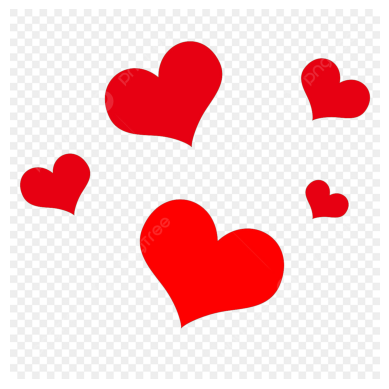

In [63]:
plt.imshow(image_pixels, cmap="gray")
plt.axis("off")
plt.show()

In [64]:
if image_pixels.shape[-1] == 4:
    image_pixels = image_pixels[..., :3]  # discard alpha

In [65]:
gray_img = color.rgb2gray(image_pixels)
gray_img[30:]

array([[1.        , 1.        , 1.        , ..., 0.93333333, 0.93333333,
        0.93333333],
       [1.        , 1.        , 1.        , ..., 0.9372549 , 0.9372549 ,
        0.9372549 ],
       [1.        , 1.        , 1.        , ..., 0.93333333, 0.93333333,
        0.93333333],
       ...,
       [1.        , 1.        , 1.        , ..., 0.93333333, 0.93333333,
        0.93333333],
       [1.        , 1.        , 1.        , ..., 0.93333333, 0.93333333,
        0.93333333],
       [1.        , 1.        , 1.        , ..., 0.93333333, 0.93333333,
        0.93333333]], shape=(1170, 1200))

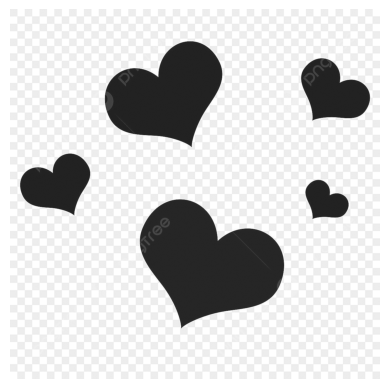

In [66]:
plt.imshow(gray_img, cmap="gray")
plt.axis("off")
plt.show()

In [67]:
edge_sobel = filters.sobel(gray_img)
edge_sobel.shape

(1200, 1200)

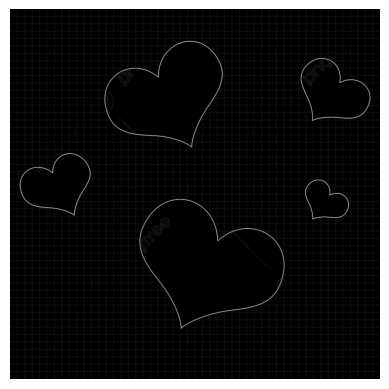

In [68]:
from skimage.util import img_as_ubyte

io.imsave("images/edge_sobel.png", img_as_ubyte(edge_sobel))

plt.imshow(edge_sobel, cmap="gray")
plt.axis("off")
plt.show()

In [69]:
threshold = 0.2
edges = edge_sobel > threshold
edges[100:110,550:570]

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True,  True,
         True,  True],
       [Fa

In [70]:
edge_pixel_indices = np.nonzero(edges)
edge_pixel_indices

(array([ 104,  104,  104, ..., 1035, 1035, 1036], shape=(9760,)),
 array([572, 573, 574, ..., 555, 556, 555], shape=(9760,)))

In [71]:
edges[104,572]

np.True_

In [72]:
edge_points = np.column_stack(np.nonzero(edges))
edge_points[:3]

array([[104, 572],
       [104, 573],
       [104, 574]])

In [73]:
contours = measure.find_contours(edges, level=0.5)
contours

[array([[448.5, 589. ],
        [448.5, 588. ],
        [448. , 587.5],
        ...,
        [447.5, 590. ],
        [448. , 589.5],
        [448.5, 589. ]], shape=(1511, 2)),
 array([[445. , 588.5],
        [444.5, 588. ],
        [444. , 587.5],
        ...,
        [445. , 587.5],
        [445.5, 588. ],
        [445. , 588.5]], shape=(1499, 2)),
 array([[362.5, 981. ],
        [362.5, 980. ],
        [362. , 979.5],
        ...,
        [361.5, 982. ],
        [362. , 981.5],
        [362.5, 981. ]], shape=(887, 2)),
 array([[359. , 982.5],
        [358.5, 983. ],
        [358.5, 984. ],
        ...,
        [359. , 981.5],
        [359.5, 982. ],
        [359. , 982.5]], shape=(873, 2)),
 array([[669.5, 209. ],
        [669.5, 208. ],
        [669.5, 207. ],
        ...,
        [668. , 209.5],
        [669. , 209.5],
        [669.5, 209. ]], shape=(897, 2)),
 array([[665. , 206.5],
        [664. , 206.5],
        [663. , 206.5],
        ...,
        [665.5, 205. ],
        [665.5

In [74]:
test_cont = contours[2]
test_cont.shape

(887, 2)

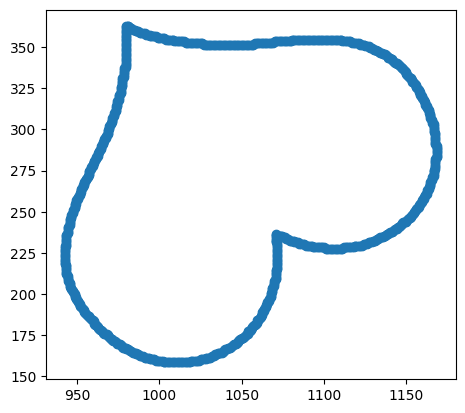

In [75]:
# plot the contour points
plt.plot(test_cont[:, 1], test_cont[:, 0], 'o')
plt.axis('image')
plt.show()

In [76]:
largest_countour_idx = 0
largest_countour_cnt = -1
for i, contour in enumerate(contours):
    n_points = contour.shape[0]
    if n_points < 20:
        continue

    if n_points > largest_countour_cnt:
        largest_countour_cnt = n_points
        largest_countour_idx = i
        print(f"New largest contour: {n_points}")

        y_vals = contour[:, 0]
        x_vals = contour[:, 1]

x_vals.shape, y_vals.shape

New largest contour: 1511
New largest contour: 1859


((1859,), (1859,))

In [77]:
t = np.arange(len(y_vals))
n = len(t)
n, t

(1859, array([   0,    1,    2, ..., 1856, 1857, 1858], shape=(1859,)))

In [78]:
max_n = 500

if n > max_n:
    y_vals = y_vals[::int(n/max_n)]
    x_vals = x_vals[::int(n/max_n)]
    n = len(x_vals)
    t = np.arange(n)
y_vals, y_vals, t

(array([1036.5, 1035. , 1032. , 1029. , 1026.5, 1024. , 1021. , 1019. ,
        1016. , 1014. , 1011. , 1009. , 1006.5, 1004. , 1002. ,  999.5,
         997. ,  995. ,  993. ,  990.5,  988. ,  986. ,  984. ,  982. ,
         979.5,  977.5,  975. ,  973. ,  971. ,  969. ,  967. ,  965. ,
         963. ,  961. ,  959. ,  957. ,  954.5,  952.5,  950.5,  948.5,
         947. ,  945. ,  943. ,  941. ,  939. ,  937. ,  935. ,  933. ,
         931. ,  929.5,  927.5,  926. ,  924. ,  922. ,  920. ,  918.5,
         916.5,  915. ,  913. ,  911. ,  909.5,  907.5,  906. ,  904. ,
         902.5,  900.5,  899. ,  897. ,  895.5,  894. ,  892. ,  890.5,
         889. ,  887. ,  885. ,  883.5,  882. ,  880.5,  878.5,  877. ,
         875. ,  873.5,  872. ,  870. ,  868.5,  866.5,  865. ,  863. ,
         861.5,  860. ,  858. ,  856.5,  854.5,  853. ,  851. ,  849.5,
         847.5,  846. ,  844. ,  842. ,  840.5,  838.5,  837. ,  835. ,
         833. ,  831. ,  829.5,  827.5,  825.5,  824. ,  822. , 

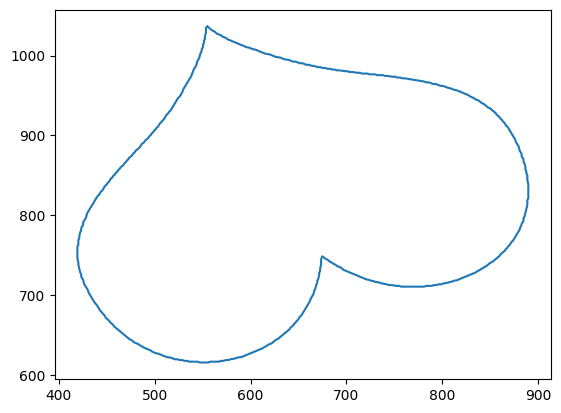

In [79]:
plt.plot(x_vals, y_vals)
plt.show()

In [80]:

t = t[::10]
x_vals = x_vals[::10]
y_vals = y_vals[::10]


t = (t - t.min()) / (t.max() - t.min())


poly_n = 5

coeffs_x = np.polyfit(t, x_vals, deg=poly_n)
coeffs_y = np.polyfit(t, y_vals, deg=poly_n)

n, t


(620,
 array([0.        , 0.01639344, 0.03278689, 0.04918033, 0.06557377,
        0.08196721, 0.09836066, 0.1147541 , 0.13114754, 0.14754098,
        0.16393443, 0.18032787, 0.19672131, 0.21311475, 0.2295082 ,
        0.24590164, 0.26229508, 0.27868852, 0.29508197, 0.31147541,
        0.32786885, 0.3442623 , 0.36065574, 0.37704918, 0.39344262,
        0.40983607, 0.42622951, 0.44262295, 0.45901639, 0.47540984,
        0.49180328, 0.50819672, 0.52459016, 0.54098361, 0.55737705,
        0.57377049, 0.59016393, 0.60655738, 0.62295082, 0.63934426,
        0.6557377 , 0.67213115, 0.68852459, 0.70491803, 0.72131148,
        0.73770492, 0.75409836, 0.7704918 , 0.78688525, 0.80327869,
        0.81967213, 0.83606557, 0.85245902, 0.86885246, 0.8852459 ,
        0.90163934, 0.91803279, 0.93442623, 0.95081967, 0.96721311,
        0.98360656, 1.        ]))

In [81]:
t_for_plot = np.linspace(0, n-1, 300)
x_poly = np.polyval(coeffs_x, t_for_plot)
y_poly = np.polyval(coeffs_y, t_for_plot)
t_for_plot, x_poly, y_poly

(array([  0.        ,   2.07023411,   4.14046823,   6.21070234,
          8.28093645,  10.35117057,  12.42140468,  14.4916388 ,
         16.56187291,  18.63210702,  20.70234114,  22.77257525,
         24.84280936,  26.91304348,  28.98327759,  31.05351171,
         33.12374582,  35.19397993,  37.26421405,  39.33444816,
         41.40468227,  43.47491639,  45.5451505 ,  47.61538462,
         49.68561873,  51.75585284,  53.82608696,  55.89632107,
         57.96655518,  60.0367893 ,  62.10702341,  64.17725753,
         66.24749164,  68.31772575,  70.38795987,  72.45819398,
         74.52842809,  76.59866221,  78.66889632,  80.73913043,
         82.80936455,  84.87959866,  86.94983278,  89.02006689,
         91.090301  ,  93.16053512,  95.23076923,  97.30100334,
         99.37123746, 101.44147157, 103.51170569, 105.5819398 ,
        107.65217391, 109.72240803, 111.79264214, 113.86287625,
        115.93311037, 118.00334448, 120.0735786 , 122.14381271,
        124.21404682, 126.28428094, 128.

In [82]:
poly_x = np.poly1d(coeffs_x)
poly_y = np.poly1d(coeffs_y)

t_poly = np.linspace(0, 1, 500)

x_poly = poly_x(t_poly)
y_poly = poly_y(t_poly)


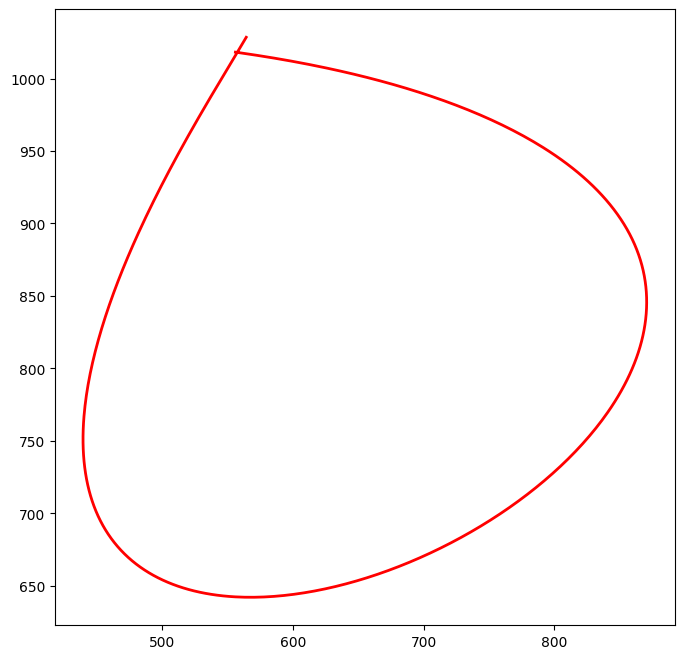

In [83]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x_poly, y_poly, color="red", linewidth=2)

In [84]:
# pip install scipy
from scipy.interpolate import CubicSpline

In [85]:
sx = CubicSpline(t, x_vals, bc_type="natural")
sy = CubicSpline(t, y_vals, bc_type="natural")

In [86]:
t_for_plot = np.linspace(0, n-1, 5000)
x_poly = sx(t_for_plot)
y_poly = sy(t_for_plot)

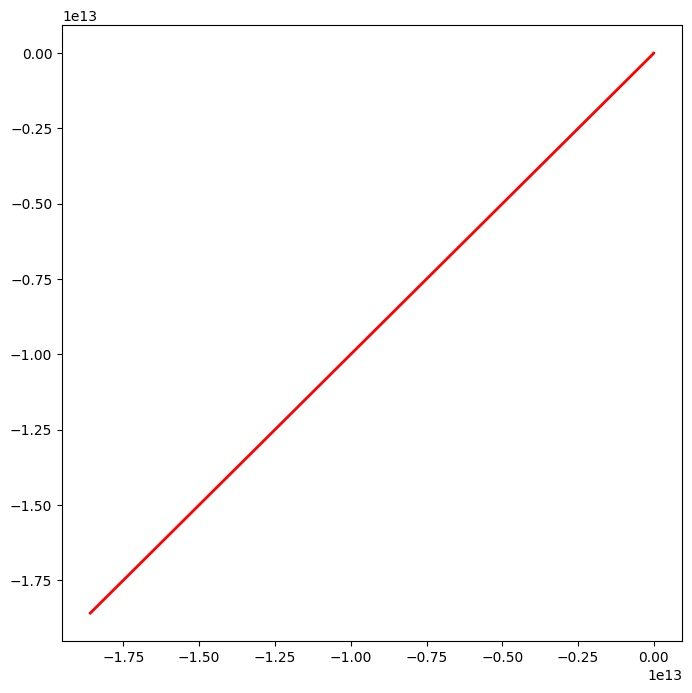

In [87]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x_poly, y_poly, color="red", linewidth=2)